In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/inv.csv',index_col= 'ds',parse_dates=True)
data.head()
data.asfreq('D')

,y
ds,


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2018-12-01 to 2017-05-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       555 non-null    int64
dtypes: int64(1)
memory usage: 28.7 KB


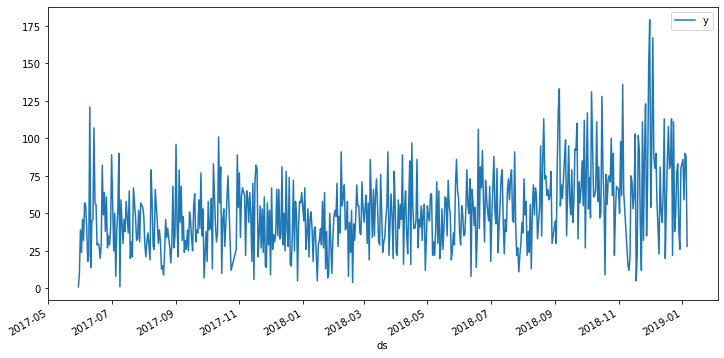

In [ ]:
data.plot(figsize=(12,6))

In [ ]:
len(data)

555

In [ ]:
train = data.iloc[:543]
test = data.iloc[543:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data.head(),data.tail()

(              y
 ds             
 2018-12-01  179
 2018-12-04  167
 2018-11-30  148
 2018-11-05  136
 2018-09-05  133,             y
 ds           
 2017-12-27  5
 2018-01-15  5
 2018-02-18  4
 2017-07-09  1
 2017-05-30  1)

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[1.        ],
       [0.92941176],
       [0.81764706],
       [0.74705882],
       [0.72941176],
       [0.71764706],
       [0.7       ],
       [0.67058824],
       [0.65882353],
       [0.64705882]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generater
n_input = 3
n_feature = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the array: 
[1.         0.92941176 0.81764706]
Predict this y: 
[[0.74705882]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# for 12 months 
n_input = 12 
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input, batch_size=1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs =50)

Epoch 1/50
531/531 [==============================] - 5s 7ms/step - loss: 0.0015
Epoch 2/50
531/531 [==============================] - 3s 7ms/step - loss: 4.8382e-05
Epoch 3/50
531/531 [==============================] - 3s 6ms/step - loss: 1.2376e-04
Epoch 4/50
531/531 [==============================] - 3s 6ms/step - loss: 7.1019e-05
Epoch 5/50
531/531 [==============================] - 4s 7ms/step - loss: 6.1360e-05
Epoch 6/50
531/531 [==============================] - 4s 7ms/step - loss: 5.9311e-05
Epoch 7/50
531/531 [==============================] - 3s 6ms/step - loss: 4.8144e-05
Epoch 8/50
531/531 [==============================] - 4s 7ms/step - loss: 6.4874e-05
Epoch 9/50
531/531 [==============================] - 4s 7ms/step - loss: 4.6897e-05
Epoch 10/50
531/531 [==============================] - 4s 7ms/step - loss: 7.3395e-05
Epoch 11/50
531/531 [==============================] - 3s 6ms/step - loss: 3.9844e-05
Epoch 12/50
531/531 [==============================] - 4s 7ms/step 

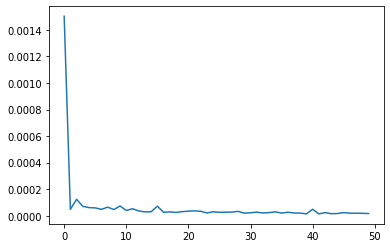

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1,n_input,n_feature))


In [ ]:
model.predict(last_train_batch)

array([[0.00240169]], dtype=float32)

In [ ]:
scaled_test[0]

array([-0.00588235])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):
   current_pred = model.predict(current_batch)[0]
   test_predictions.append(current_pred)
   current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.00240169], dtype=float32),
 array([0.00251894], dtype=float32),
 array([0.00262314], dtype=float32),
 array([0.0027301], dtype=float32),
 array([0.0028287], dtype=float32),
 array([0.00291996], dtype=float32),
 array([0.00300688], dtype=float32),
 array([0.00308516], dtype=float32),
 array([0.0031556], dtype=float32),
 array([0.00321894], dtype=float32),
 array([0.00327792], dtype=float32),
 array([0.00332963], dtype=float32)]

In [ ]:
test.head()

,y
ds,
2018-06-12,8
2018-02-14,8
2017-07-05,8
2017-09-28,7
2018-01-25,7


In [ ]:
true_preditions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_preditions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


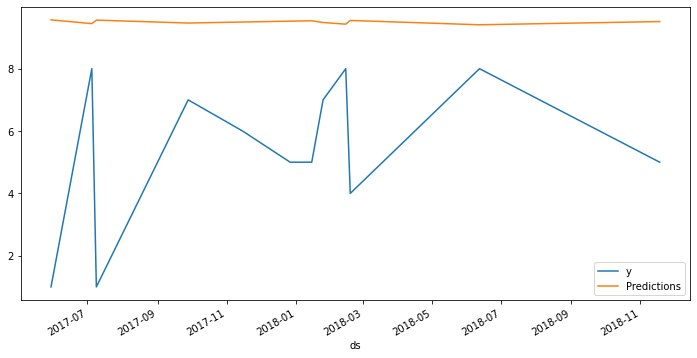

In [ ]:
test.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(test['y'],test['Predictions']))
print(rsme)

4.737626512028721
